In [3]:
import matplotlib.pylab as plt
import numpy as np
from scipy.stats import norm


In [14]:
def pdf3(x):
    #initialize 3 different normal distributions and sum
    rv = norm(loc = -2., scale = 1.0)
    rv1 = norm(loc = 0., scale = 2.0)
    rv2 = norm(loc = 2., scale = 0.8)

    return rv.pdf(x) + rv1.pdf(x) + rv2.pdf(x)

def gen_data(npoints=10, scale=8.):
    np.random.seed(1)
    xp = scale*np.random.uniform(-1.0,1.0,size=npoints)
    xp = np.insert(xp, 0,[-scale])
    xp = np.append(xp, [scale])
    xp = np.sort(xp)
    return xp, pdf3(xp)

def find_x_index(x, xg_sorted):
    index = np.where(xg_sorted > x)
    if len(index) == 0:
        print("no index found")
        print(x, xrandom[0], xrandom[-1])
        return None
    else:
        return index[0][0]-1
    
    

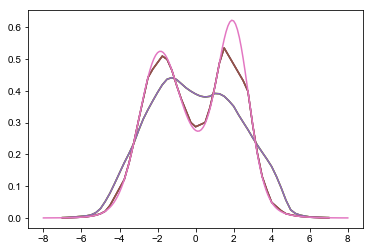

In [15]:
xt = np.arange(-8, 8.1, .1)
ftruth = pdf3(xt)

#plot the pdfs of these normal distributions 
plt.plot(xt, ftruth)
plt.show()

In [16]:
xr, fxr = gen_data(npoints=60)
print xr

[-8.         -7.99817    -7.70738756 -7.69012867 -7.56179851 -7.37512347
 -7.14619928 -6.63929262 -6.52258248 -6.42645066 -6.34838389 -5.91954285
 -5.75380898 -5.6523428  -5.65190575 -5.28271329 -5.01983662 -4.83037617
 -4.728764   -4.61395014 -3.75125345 -3.51289613 -3.39559458 -3.30217363
 -3.16267884 -2.98521315 -2.9517499  -2.47102837 -1.65172041 -1.32764792
 -1.32312316 -1.29288777 -1.262278   -0.83370358 -0.13482945  0.53064456
  0.62106774  0.93903726  1.18588169  1.42888859  2.72748016  2.86136853
  2.96351201  2.98401484  3.07003382  3.07716185  3.19613376  3.5251919
  3.97065047  4.00230904  4.62846926  4.8119131   5.35401075  6.02222644
  6.04987898  6.05028005  6.31370662  6.53752805  7.32623248  7.49218521
  7.82177742  8.        ]


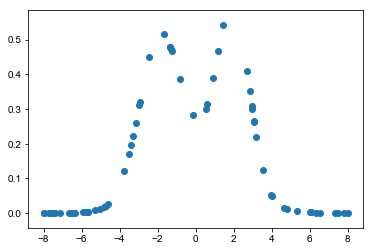

In [17]:
plt.scatter(xr, fxr)
plt.show()


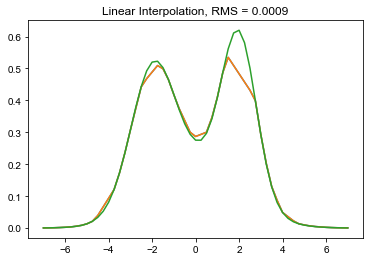

In [19]:
#Set of interpolation grid

xg = np.arange(-7., 7.25, .25)
ftruth = pdf3(xg)
fxg = np.zeros([xg.shape[0],])

# Linear interpolation

for n, x in enumerate(xg):
    index = find_x_index(x, xr)
    fxg[n] = fxr[index] + (x-xr[index])/(xr[index+1]-xr[index])*(fxr[index+1]-fxr[index])

RMS = (fxg - ftruth).var()
plt.plot(xg, fxg)
plt.plot(xg, ftruth)
plt.title("Linear Interpolation, RMS = %5.4f" % RMS)
plt.show()

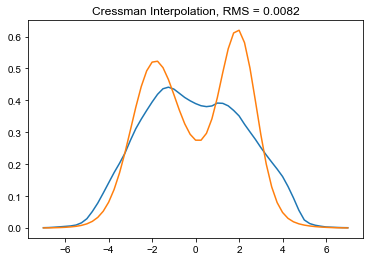

In [20]:
# Cressman
ROI = 2.0
ROISQ = ROI*ROI

for n, x in enumerate(xg):
    disSQ = (x - xr)**2
    weights = (ROISQ - disSQ)/(ROISQ + disSQ)
    fwghts  = fxr*weights
    index   = weights > 0.0
    fxg[n]  = np.sum(fwghts[index])/np.sum(weights[index])

RMS = (fxg - ftruth).var()
plt.plot(xg, fxg)
plt.plot(xg, ftruth)
plt.title("Cressman Interpolation, RMS = %5.4f" % RMS)
plt.show()

ROI:   2.0
ROI:   1.0


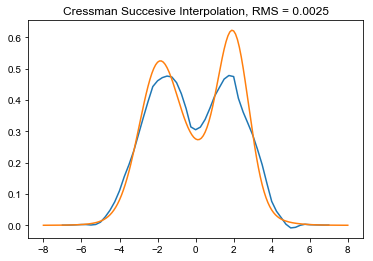

In [142]:
# Cressman succesive
ROI = [2., 1.0]

priors = np.zeros_like(fxr)
fxg    = np.zeros_like(xg)

for m, rad in enumerate(ROI):
    print "ROI:  ", rad
    ROISQ = rad*rad
    
# Linearly interpolate the background grid values to observation points.
    for n, x in enumerate(xr):
        if( x > xg.min() and x < xg.max()):
            index = find_x_index(x, xg)
            priors[n] = fxg[index] + (x-xg[index])/(xg[index+1]-xg[index])*(fxg[index+1]-fxg[index])
        else:
            priors[n] = fxr[n]
    
    for n, x in enumerate(xg):
        disSQ = (x - xr)**2
        weights = (ROISQ - disSQ)/(ROISQ + disSQ)
        fwghts  = (fxr-priors)*weights
        index   = weights > 0.0
        if( np.sum(index) > 2):
            fxg[n] = fxg[n] + np.sum(fwghts[index])/np.sum(weights[index])

RMS = (fxg - ftruth).var()
plt.plot(xg, fxg)
plt.plot(xt, pdf)
plt.title("Cressman Succesive Interpolation, RMS = %5.4f" % RMS)
plt.show()
